In [1]:
import tensorflow as tf

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import models, layers

In [4]:
import os

In [7]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [12]:
dataset = image_dataset_from_directory("PlantVillage",
                                       shuffle=True,
                                       batch_size=BATCH_SIZE,
                                       seed = 42,
                                       image_size=(IMG_SIZE,IMG_SIZE)
                                      )

Found 2152 files belonging to 3 classes.


In [13]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
len(dataset)

68

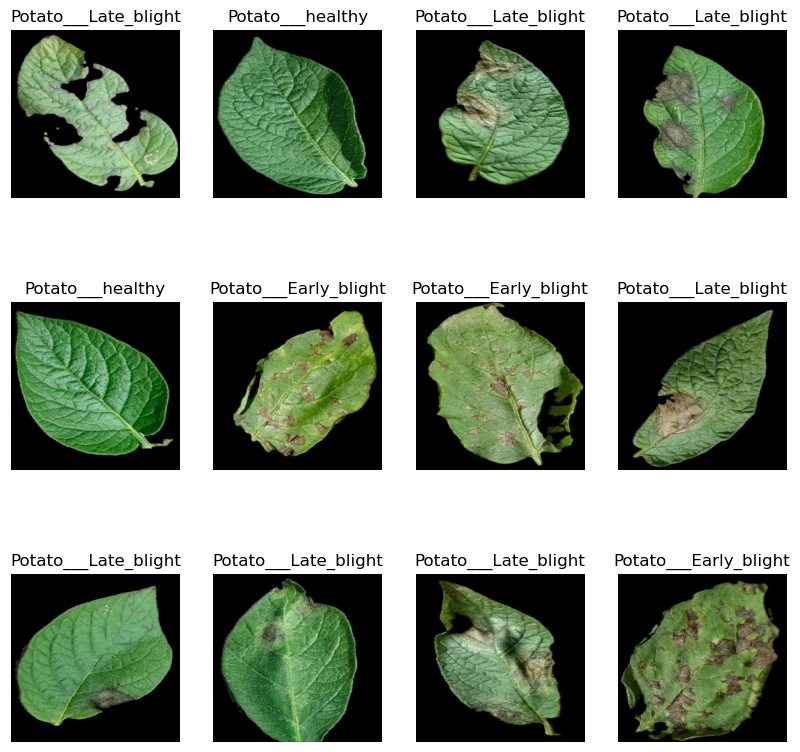

In [17]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [18]:
len(dataset)

68

In [19]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [20]:
train_ds = dataset.take(54)
len(train_ds)

54

In [21]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [22]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=31053):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds)

54

In [26]:
len(test_ds)

8

In [27]:
len(val_ds)

6

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [29]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [32]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

])

In [34]:
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = (BATCH_SIZE,256,256,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=(BATCH_SIZE,256,256,CHANNELS))

In [35]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [36]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 64s 1s/step - loss: 0.6861 - accuracy: 0.6591 - val_loss: 0.3263 - val_accuracy: 0.8802
Epoch 2/50
54/54 [==============================] - 50s 913ms/step - loss: 0.3110 - accuracy: 0.8646 - val_loss: 0.2025 - val_accuracy: 0.9323
Epoch 3/50
54/54 [==============================] - 46s 858ms/step - loss: 0.2417 - accuracy: 0.9039 - val_loss: 0.2118 - val_accuracy: 0.9062
Epoch 4/50
54/54 [==============================] - 46s 856ms/step - loss: 0.2401 - accuracy: 0.8999 - val_loss: 0.1591 - val_accuracy: 0.9427
Epoch 5/50
54/54 [==============================] - 46s 858ms/step - loss: 0.2193 - accuracy: 0.9109 - val_loss: 0.1760 - val_accuracy: 0.9635
Epoch 6/50
54/54 [==============================] - 46s 853ms/step - loss: 0.1901 - accuracy: 0.9311 - val_loss: 0.1503 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 46s 854ms/step - loss: 0.1633 - accuracy: 0.9340 - val_loss: 0.1877 - val_accuracy: 0.9323
Ep

54/54 [==============================] - 46s 848ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 42/50
54/54 [==============================] - 46s 851ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.4164 - val_accuracy: 0.9115
Epoch 43/50
54/54 [==============================] - 46s 847ms/step - loss: 0.0642 - accuracy: 0.9763 - val_loss: 0.0225 - val_accuracy: 0.9896
Epoch 44/50
54/54 [==============================] - 48s 897ms/step - loss: 0.0207 - accuracy: 0.9913 - val_loss: 0.0125 - val_accuracy: 0.9948
Epoch 45/50
54/54 [==============================] - 47s 873ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0073 - val_accuracy: 0.9948
Epoch 46/50
54/54 [==============================] - 47s 879ms/step - loss: 8.6747e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0.9948
Epoch 47/50
54/54 [==============================] - 46s 855ms/step - loss: 0.0392 - accuracy: 0.9867 - val_loss: 0.0183 - val_accuracy: 0.9948


In [37]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 200ms/step - loss: 0.0322 - accuracy: 0.9844


In [38]:
scores

[0.032233577221632004, 0.984375]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

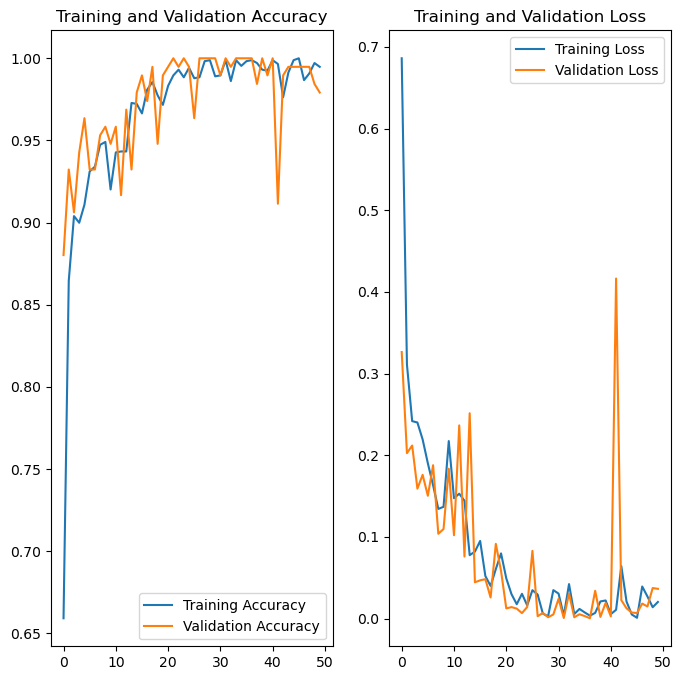

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 232ms/step
Predicted Label: Potato___Late_blight


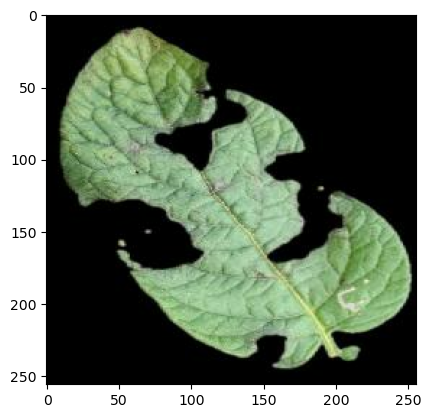

In [52]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    plt.show()
    print("Actual Label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

In [51]:
model_versions=1
model.save(f"{model_versions}")

INFO:tensorflow:Assets written to: 1\assets


INFO:tensorflow:Assets written to: 1\assets
